#Forest fire forecasting - Regression

## Importing libraries

In [ ]:
import time
import numpy as np 
import pandas as pd  
import keras
from matplotlib import pyplot as plt
import seaborn as sb
import tensorflow as tf
from numpy.lib.function_base import median

from google.colab import drive

from keras import layers 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR,SVC
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

## Load data

In [ ]:
def mount_folder():
    drive.mount('https://drive.google.com/file/d/1GI4nkTM6L60gukYNVoe6tAjjK_4ZP4UX/view?usp=sharing')

def load_data(): 
    # Define the file path
    path = './shared/forestfires.csv' 
    # Load the data as a Pandas DataFrame
    df = pd.read_csv(path) 
    
    return df

def load_data_from_github():
  url = 'https://raw.githubusercontent.com/erasherra/Forest_fire_prediction/main/forestfires.csv'
  df = pd.read_csv(url)
  return df

In [ ]:
df = load_data_from_github()

## Data preprocessing

### View dataset

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Check null values

In [ ]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

### Converting categorical values to numerical

In [ ]:
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.head(15)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


### Distribution of area values

In [ ]:
print('The number of records with a burnt area smaller than 100m^2 is: ',   
      len(df[df['area'] == 0]))

print('The number of records with burnt area bigger than 100m^2 is: ', 
      len(df[df['area'] != 0]))

print("The number of records with burnt area between 100m^2 and 1ha is: ", 
      len(df.loc[(df['area'] > 0) & (df['area'] <= 1)]))

The number of records with a burnt area smaller than 100m^2 is:  247
The number of records with burnt area bigger than 100m^2 is:  270
The number of records with burnt area between 100m^2 and 1ha is:  27


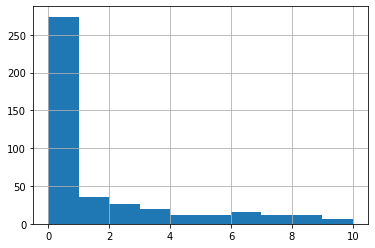

In [ ]:
hist_0_10 = df['area'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10])

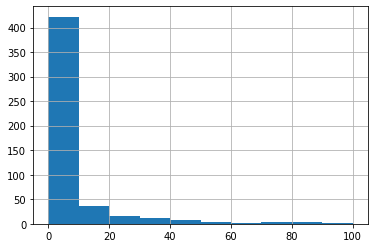

In [ ]:
hist_0_100 = df['area'].hist(bins=[0,10,20,30,40,50,60,70,80,90,100])

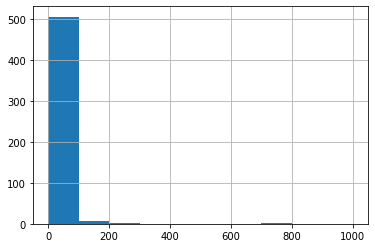

In [ ]:
hist_0_1000 = df['area'].hist(bins=[0,100,200,300,400,500,600,700,800,900,1000])

### Corelation between features

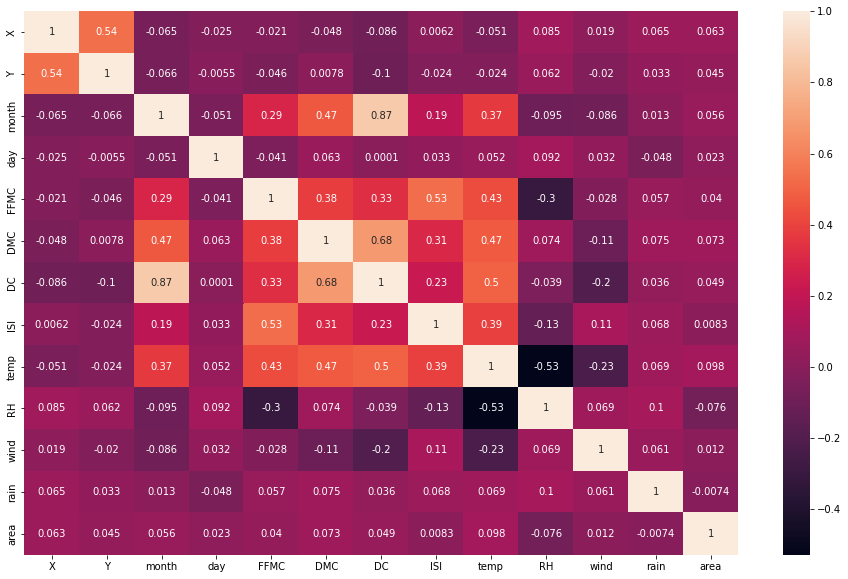

In [ ]:
plt.figure(figsize=(16, 10))
corrMatrix = df.corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df.corr()['area'].sort_values()

RH      -0.075519
rain    -0.007366
ISI      0.008258
wind     0.012317
day      0.023226
FFMC     0.040122
Y        0.044873
DC       0.049383
month    0.056496
X        0.063385
DMC      0.072994
temp     0.097844
area     1.000000
Name: area, dtype: float64

### Statistical properties of the data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
month,517.0,7.475822,2.275990,1.0,7.0,8.00,9.00,12.00
day,517.0,4.259188,2.072929,1.0,2.0,5.00,6.00,7.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00


### Log transformation to the area values

In [ ]:
df[['area']] = np.log(df[['area']] + 1)

### Split the data in training, validation and test set

In [ ]:
#To use all features:
X, Y = df[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']], df[['area']]
Xtrainval, Xtest, Ytrainval, Ytest = train_test_split(X, Y, test_size=0.20, random_state=42)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrainval, Ytrainval, test_size=0.20, random_state=42)

#To use temperature, rain, relative humidity and wind speed features:
#X, Y = df[['temp', 'RH', 'wind', 'rain']], df[['area']]
#Xtrainval, Xtest, Ytrainval, Ytest = train_test_split(X, Y, test_size=0.20, random_state=42)
#Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrainval, Ytrainval, test_size=0.20, random_state=42)


## Scorer and accuracy functions

In [ ]:
#Helper function to compute MSE ('score')
def scorermse(model, X, y):
  y_pred = model.predict(X)
  score = mean_squared_error(y,y_pred)
  return score

#Helper function to compute MAE ('score')
def scorermae(model, X, y):
  y_pred = model.predict(X)
  score = mae(y,y_pred)
  return score


#Accuracy function used in the test set
# % of correct predictions with a given absolute/relative error.
# err is the absolute error permitted in hectares (1 or 2 ha is what is used in the paper)
# OR the relative error permitted in %
def scoreaccuracy(model, x, y, err_type, err):
    y_pred = model.predict(x)
    # Inverse log transform
    y_pred = np.exp(y_pred) - 1
    y = np.exp(y) - 1
    # Replacing negative area elements by 0
    y_pred[y_pred < 0] = 0
    y[y < 0] = 0
    # Make y_pred the same shape as y
    y_pred = y_pred.reshape(-1, 1)
    abs_err_vec = np.abs(np.subtract(y, y_pred))
    if err_type == "abs_err":
        score = (abs_err_vec < err).sum()/np.size(abs_err_vec)
    else:
        # Cannot compute relative error around 0, so we'll take 1/100 hectare abs error as good, as they do in the paper
        # Then we check all other elements relative error
        score = (abs_err_vec[y == 0] < 1/100).sum() + (np.divide(abs_err_vec[y != 0], y[y != 0]) < err/100).sum()
        score = score / np.size(abs_err_vec)
        print('Hello: ')
        print(score)


    return float(score)


## Linear Regression

In [ ]:
def kfold(reg,X,Y,cv,train_score):
  cv_resultsmae = cross_validate(reg, X, Y, scoring=scorermae, cv = 10, return_train_score = train_score)
  cv_resultsmse = cross_validate(reg, X, Y, scoring=scorermse, cv = 10, return_train_score = train_score)
  
  # Get train and validation error
  errors_trainmae = cv_resultsmae['train_score']
  errors_valmae = cv_resultsmae['test_score']
  errors_trainmse = cv_resultsmse['train_score']
  errors_valmse = cv_resultsmse['test_score']

  err_trainmae = np.mean(errors_trainmae)
  err_valmae = np.mean(errors_valmae)
  err_trainmse = np.mean(errors_trainmse)
  err_valmse = np.mean(errors_valmse)


  print('****************************************************************\nMAE:')
  print(f"Validation MAE for 10-fold CV folds are: {errors_valmae}")
  print('----------------------------------------------------------------')
  print(f"Average validation MAE for for 10-fold CV folds is: {err_valmae: .2f}")
  print(f"Average training MAE for for 10-fold CV folds is: {err_trainmae: .2f}")
  print('****************************************************************\nMSE:')
  print(f"Validation MSE for 10-fold CV folds are: {errors_valmse}")
  print('---------------------------------------------------------------')
  print(f"Average validation MSE for for 10-fold CV folds is: {err_valmse: .2f}")
  print(f"Average training MSE for for 10-fold CV folds is: {err_trainmse: .2f}")
  print('***************************************************************')
  

 
  return err_valmse, np.std(errors_trainmse)

# Create the linear regression object
start=time.time()
lin_reg = LinearRegression(fit_intercept=True) 
kfold(lin_reg, Xtrainval, Ytrainval, 10, True)
end = time.time()
print("Execution time: " + str(end-start))

****************************************************************
MAE:
Validation MAE for 10-fold CV folds are: [1.05143858 1.27429838 1.04941532 0.98789492 1.57435524 1.22264324
 1.15616291 1.34887101 1.00455172 1.05349901]
----------------------------------------------------------------
Average validation MAE for for 10-fold CV folds is:  1.17
Average training MAE for for 10-fold CV folds is:  1.11
****************************************************************
MSE:
Validation MSE for 10-fold CV folds are: [1.52953939 2.28468954 1.67800295 1.46626449 5.9209127  2.06357975
 1.80402675 2.87020985 1.36098432 1.69148343]
---------------------------------------------------------------
Average validation MSE for for 10-fold CV folds is:  2.27
Average training MSE for for 10-fold CV folds is:  1.82
***************************************************************
Execution time: 0.19830846786499023


## Huber Regression

In [ ]:
# Create the huber regression object
hub_reg = HuberRegressor(fit_intercept=True, max_iter = 10000) 
kfold(hub_reg, Xtrainval, Ytrainval.values.ravel(), 10, True)

****************************************************************
MAE:
Validation MAE for 10-fold CV folds are: [1.04245288 1.22226462 1.01739656 0.95507508 1.49970365 1.16501013
 1.10027476 1.30668204 0.94503654 0.98584187]
----------------------------------------------------------------
Average validation MAE for for 10-fold CV folds is:  1.12
Average training MAE for for 10-fold CV folds is:  1.07
****************************************************************
MSE:
Validation MSE for 10-fold CV folds are: [1.60117859 2.33156201 1.69072188 1.51385547 4.67019858 2.12831369
 1.76366158 3.04784141 1.28676668 1.73423938]
---------------------------------------------------------------
Average validation MSE for for 10-fold CV folds is:  2.18
Average training MSE for for 10-fold CV folds is:  1.90
***************************************************************


(2.1768339290977243, 0.056273959066812575)

## Ridge Regression

In [ ]:
alpha_vals = np.linspace(0.001, 10, 50)
rid_reg_mse = RidgeCV(alphas = alpha_vals, fit_intercept=True, scoring=scorermse, cv=10)
rid_reg_mae = RidgeCV(alphas = alpha_vals, fit_intercept=True, scoring=scorermae, cv=10)
rid_reg_mse.fit(Xtrainval, Ytrainval)
rid_reg_mae.fit(Xtrainval, Ytrainval)

print("Best value of alpha using MSE: ", rid_reg_mse.alpha_)
print("Average validation MSE for 10-fold CV is: ", rid_reg_mse.best_score_)
print("Best value of alpha using MAE: ", rid_reg_mae.alpha_)
print("Average validation MAE for 10-fold CV is: ", rid_reg_mae.best_score_)

Best value of alpha using MSE:  0.001
Average validation MSE for 10-fold CV is:  2.266618781049595
Best value of alpha using MAE:  0.001
Average validation MAE for 10-fold CV is:  1.172298484018816


## Lasso Regression

In [ ]:
alpha_vals = np.linspace(0.001, 10, 50)
lasso_reg_mse = LassoCV(alphas = alpha_vals, fit_intercept=True, cv=10)
lasso_reg_mse.fit(Xtrainval, Ytrainval.values.ravel())

print("Best value of alpha using MSE: ", lasso_reg_mse.alpha_)
print("Average validation MSE for 10-fold CV is: ", min(lasso_reg_mse.mse_path_.mean(1)))
#There is no scoring parameter in LassoCV to use MAE, it uses MSE as default

Best value of alpha using MSE:  1.4294285714285715
Average validation MSE for 10-fold CV is:  1.887975667092689


## Polinomial Regression

In [ ]:
for i in [1,2,3,4,5]:
  poly = PolynomialFeatures(degree=i)

  Xtrainval_poly = poly.fit_transform(Xtrainval)

  poly_reg=LinearRegression(fit_intercept = True)
  print("Polinomial regression with degree ", i, ":\n", sep = "")
  kfold(poly_reg, Xtrainval_poly, Ytrainval,10,True)
  print("\n\n\n")

Polinomial regression with degree 1:

****************************************************************
MAE:
Validation MAE for 10-fold CV folds are: [1.05143858 1.27429838 1.04941532 0.98789492 1.57435524 1.22264324
 1.15616291 1.34887101 1.00455172 1.05349901]
----------------------------------------------------------------
Average validation MAE for for 10-fold CV folds is:  1.17
Average training MAE for for 10-fold CV folds is:  1.11
****************************************************************
MSE:
Validation MSE for 10-fold CV folds are: [1.52953939 2.28468954 1.67800295 1.46626449 5.9209127  2.06357975
 1.80402675 2.87020985 1.36098432 1.69148343]
---------------------------------------------------------------
Average validation MSE for for 10-fold CV folds is:  2.27
Average training MSE for for 10-fold CV folds is:  1.82
***************************************************************




Polinomial regression with degree 2:

***************************************************

## Decision Tree

### Naive Pruning (Minimum data points x leaf)

The min samples x leaf that produces the smallest MAE is: 164
The lowest 10-fold cv MAE is: 1.0804119858640953


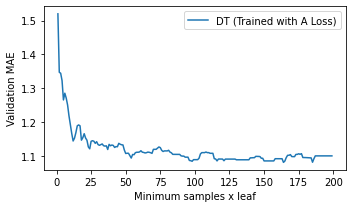

The min samples x leaf that produces the smallest MSE is: 75
The lowest 10-fold cv MSE is: 1.827855323171557


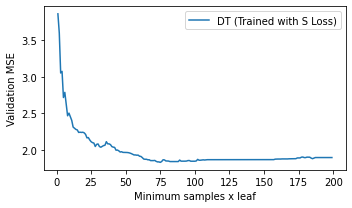

In [ ]:
# Loop to check for lowest val error as a function of min_samples
min_samp_leaf_vec = np.arange(1, 200)
err_val_vec = []

for i in min_samp_leaf_vec:
    # Create the DT regression object
    dt_reg = DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=i)

    # Use 10-fold cross validation
    cv_results = cross_validate(dt_reg, Xtrainval, Ytrainval, scoring=scorermae, cv=10, return_train_score=True)

    # Get train and validation error
    errors_train = cv_results['train_score']
    errors_val = cv_results['test_score']

    err_train = np.mean(errors_train)
    err_val = np.mean(errors_val)

    err_val_vec.append(err_val)

# Finding the minimum
print("The min samples x leaf that produces the smallest MAE is:", min_samp_leaf_vec[np.argmin(err_val_vec)])
print("The lowest 10-fold cv MAE is:", np.min(err_val_vec))

# Plotting the results
plt.figure(figsize=(5, 3))
plt.plot(min_samp_leaf_vec, err_val_vec, label="DT (Trained with A Loss)")

plt.legend(loc='upper right')
plt.xlabel('Minimum samples x leaf')
plt.ylabel('Validation MAE')
plt.tight_layout()
plt.show()

# The same but for MSE
err_val_vec = []
for i in min_samp_leaf_vec:
    # Create the DT regression object
    dt_reg = DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=i)

    # Use 10-fold cross validation
    cv_results = cross_validate(dt_reg, Xtrainval, Ytrainval, scoring=scorermse, cv=10, return_train_score=True)

    # Get train and validation error
    errors_train = cv_results['train_score']
    errors_val = cv_results['test_score']

    err_train = np.mean(errors_train)
    err_val = np.mean(errors_val)

    err_val_vec.append(err_val)

# Finding the minimum
print("The min samples x leaf that produces the smallest MSE is:", min_samp_leaf_vec[np.argmin(err_val_vec)])
print("The lowest 10-fold cv MSE is:", np.min(err_val_vec))

# Plotting the results
plt.figure(figsize=(5, 3))
plt.plot(min_samp_leaf_vec, err_val_vec, label="DT (Trained with S Loss)")

plt.legend(loc='upper right')
plt.xlabel('Minimum samples x leaf')
plt.ylabel('Validation MSE')
plt.tight_layout()
plt.show()



### Cost-Complexity pruning

The a param that produces the smallest MSE is: 0.05810810810810812
The lowest 10-fold cv MSE is: 1.8939215693629663


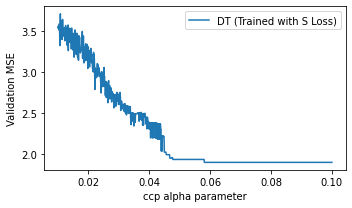

The a param that produces the smallest MAE is: 0.031621621621621625
The lowest 10-fold cv MAE is: 1.096108069924079


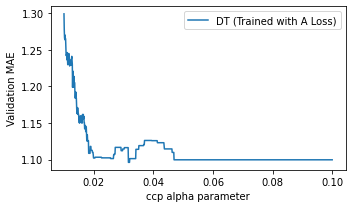

In [ ]:
# MSE
err_val_vec = []
a_vec = np.linspace(0.01, 0.1, 1000)

for a in a_vec:
    # Create the DT regression object
    dt_reg = DecisionTreeRegressor(criterion='squared_error', ccp_alpha=a)

    # Use 10-fold cross validation
    cv_results = cross_validate(dt_reg, Xtrainval, Ytrainval, scoring=scorermse, cv=10, return_train_score=True)

    # Get train and validation error
    errors_train = cv_results['train_score']
    errors_val = cv_results['test_score']

    err_train = np.mean(errors_train)
    err_val = np.mean(errors_val)

    err_val_vec.append(err_val)

# Finding the minimum
print("The a param that produces the smallest MSE is:", a_vec[np.argmin(err_val_vec)])
print("The lowest 10-fold cv MSE is:", np.min(err_val_vec))

# Plotting the results
plt.figure(figsize=(5, 3))
plt.plot(a_vec, err_val_vec, label="DT (Trained with S Loss)")

plt.legend(loc='upper right')
plt.xlabel('ccp alpha parameter')
plt.ylabel('Validation MSE')
plt.tight_layout()
plt.show()

# MAE
err_val_vec = []

for a in a_vec:
    # Create the DT regression object
    dt_reg = DecisionTreeRegressor(criterion='absolute_error', ccp_alpha=a)

    # Use 10-fold cross validation
    cv_results = cross_validate(dt_reg, Xtrainval, Ytrainval, scoring=scorermae, cv=10, return_train_score=True)

    # Get train and validation error
    errors_train = cv_results['train_score']
    errors_val = cv_results['test_score']

    err_train = np.mean(errors_train)
    err_val = np.mean(errors_val)

    err_val_vec.append(err_val)

# Finding the minimum
print("The a param that produces the smallest MAE is:", a_vec[np.argmin(err_val_vec)])
print("The lowest 10-fold cv MAE is:", np.min(err_val_vec))

# Plotting the results
plt.figure(figsize=(5, 3))
plt.plot(a_vec, err_val_vec, label="DT (Trained with A Loss)")

plt.legend(loc='upper right')
plt.xlabel('ccp alpha parameter')
plt.ylabel('Validation MAE')
plt.tight_layout()
plt.show()

## Support Vector Regression



0
****************************************************************
MAE:
Validation MAE for 10-fold CV folds are: [1.03198606 1.15028983 1.0189874  0.99827106 1.32728488 1.11995153
 1.03230038 1.29380489 0.91991636 1.00831017]
----------------------------------------------------------------
Average validation MAE for for 10-fold CV folds is:  1.09
Average training MAE for for 10-fold CV folds is:  1.09
****************************************************************
MSE:
Validation MSE for 10-fold CV folds are: [1.82708522 2.67895154 1.96286883 1.83939463 3.10265435 2.41088314
 1.90931832 3.4048908  1.39212176 2.04245541]
---------------------------------------------------------------
Average validation MSE for for 10-fold CV folds is:  2.26
Average training MSE for for 10-fold CV folds is:  2.26
***************************************************************
1
****************************************************************
MAE:
Validation MAE for 10-fold CV folds are: [1.03201203 1.15

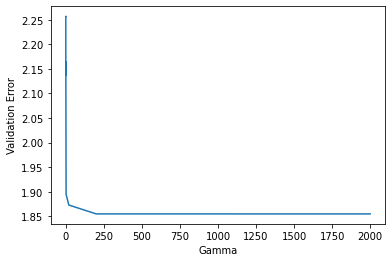

In [ ]:
start2= time.time()
#Standarize data
X_s = StandardScaler()
Y_s=StandardScaler()
Xtrainval_svr = X_s.fit_transform(Xtrainval)  #To make the algorithm easier
Ytrainval_svr = Ytrainval

N=Ytrainval_svr.shape[0]
sigma = np.std(Ytrainval_svr)
e=3*sigma*np.sqrt(np.log(N)/N)

#Fit the model using the Radial Basis Function (RBF) kernel
gammas = [2e-9, 2e-7, 2e-5,2e-3,2e-1,2,20,200,2000]
es = np.zeros(len(gammas))

m=0
for g in gammas:
  SVR_reg = SVR(kernel = 'rbf',C=3, epsilon=e, gamma=g)
  print(m)
  es[m],s=kfold(SVR_reg, Xtrainval_svr, Ytrainval_svr.values.ravel(), 10, True)
  m+=1

end2 = time.time()
  
minimum = min(es)
idx = np.argmin(es)
best_gamma = gammas[idx]
print("Best gamma value =",best_gamma)
print("Lowest validation error =", minimum)
print("Execution time: " + str(end2-start2))


plt.plot(gammas,es)
plt.xlabel('Gamma')
plt.ylabel('Validation Error')
plt.show()

Testing the model

In [ ]:
regressor = SVR(kernel = 'rbf', C=1.2, epsilon=e, gamma=2000)
regressor.fit(Xtrainval_svr,Ytrainval)
Xtest_svr = X_s.transform(Xtest)
y_pred=regressor.predict(Xtest_svr)
print("MSE: ", mean_squared_error(y_pred, Ytest))

abs_error_1=scoreaccuracy(regressor, Xtest_svr, Ytest, 'abs_err', 1)
abs_error_2=scoreaccuracy(regressor, Xtest_svr, Ytest, 'abs_err', 2)
print(abs_error_1*100)
print(abs_error_2*100)




MSE:  2.203783519324042
12.5
69.23076923076923


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Multi-layer Perceptron

In [ ]:
def plot_history(history):
  pd.DataFrame(history).plot(figsize=(7,4))
  plt.grid(True)
  plt.xlabel('epoch', fontsize=14)
  plt.show()

mean_squared_error: 1.37
mean_squared_error: 1.33
mean_squared_error: 2.61
mean_squared_error: 1.54
mean_squared_error: 1.79
mean_squared_error: 2.25
mean_squared_error: 1.86
mean_squared_error: 2.49
mean_squared_error: 3.06
mean_squared_error: 1.63
1.99 (+/- 0.55)


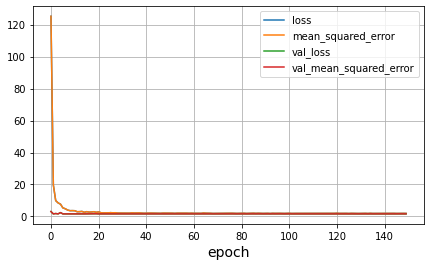

In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
cvscores = []

for train, test in k_fold.split(Xtrainval, Ytrainval):
  # Create model
  model = keras.Sequential()
  model.add(layers.Dense(200, "relu", input_shape=(12,)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(200, "relu"))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(100, "relu"))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(100, "relu"))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(20, "relu"))
  model.add(layers.Dense(1))
  # Compile model
  model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(), 
              metrics=['MeanSquaredError'])
  # Fit the model
  history = model.fit(Xtrainval.iloc[train], Ytrainval.iloc[train], validation_data = (Xtrainval.iloc[test], Ytrainval.iloc[test]), epochs=150, batch_size=10, verbose=0)
  # evaluate the model
  scores = model.evaluate(Xtrainval.iloc[test], Ytrainval.iloc[test], verbose=0)
  print("%s: %.2f" % (model.metrics_names[1], scores[1]))
  cvscores.append(scores[1])

print("%.2f (+/- %.2f)" % (np.mean(cvscores), np.std(cvscores)))
plot_history(history.history)